# Taryn Michael
# Advanced Machine Learning
# Assignment 3
# Implementing Gaussian Mixture Models vs K-means for Clustering

This notebook is based on the article by <a href = https://www.sciencedirect.com/science/article/pii/S1877050920309820> (Patel & Kushwaha, 2020) </a> which compares K-means and Gaussian Mixture Models to evaluate cluster representations of the two methods for heterogeneity in resource usage of Cloud workloads. 


`Here we are implementing GMM and KNN on the Iris dataset and comparing the performance of the two.`

## **Iris Dataset**

The Iris dataset gives the details of the length and breadth of the three flowers: Setosa, Versicolor, Virginica.

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
import pymc3
warnings.filterwarnings("ignore")
# show plots inline
%matplotlib inline


In [17]:
Iris_data = files.upload()

Saving Iris.csv to Iris.csv


In [20]:
Iris_data = pd.read_csv('Iris.csv')
Iris_data = Iris_data.drop('Id', axis=1) # get rid of the Id column - don't need it
Iris_data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
138,6.0,3.0,4.8,1.8,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
49,5.0,3.3,1.4,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


# GMM vs KNN on Iris DataSet

Since we know by now that GMM has the advantage over KNN based on our notebook whereby we compared it on randomly generated data, we will hypothesis that GMM will perform better than KNN on the dataset. However, let us test this hypothesis

In [3]:
Iris_data = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
Iris_data = pd.read_csv('Iris.csv')
Iris_data = Iris_data.drop('Id', axis=1) # get rid of the Id column - don't need it
Iris_data.sample(5)
X = Iris_data.iloc[:,0:4]
y = Iris_data.iloc[:,-1]

In [5]:

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)


Since we know that our target column consists of 3 flower species, we will specify the number of clusters k to be 3.



We can now first fit our data using the KMeans Algorithm.

Let the number of initial clusters be 3, since the flower species were divided into 3 categories:

**KMeans Clustering on Iris data**

In [ ]:
nclusters = 3 # this is the k in kmeans
seed = 0
km_I = KMeans(n_clusters=nclusters, random_state=seed)
km_I.fit(X_scaled)
# predict the cluster for each data point
y_cluster_kmeans = km_I.predict(X_scaled)



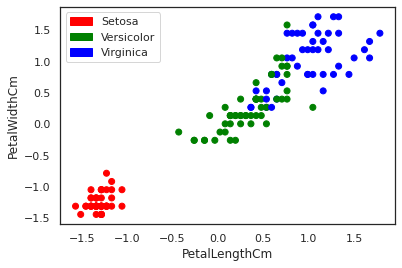

In [ ]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['blue', 'red', 'green'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_kmeans])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

The above plot provides us with the three clusters. However, we can see that there is some overlapping occuring between the Versicolor and Virginica cluster. Thus, KMeans does not perform very well in clustering this dataset.

**Elbow method to compute optimal number of clusters**

This is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.
This graph generally ends up shaped like an elbow, hence its name:

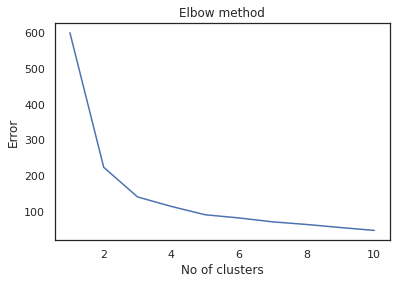

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_scaled)
    kmeans.fit(X_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. 

Thus, we can leave the number of clusters as being 3.

**Computing Silhouette Score**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
- 1: Means clusters are well apart from each other and clearly distinguished.
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way.

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4589717867018717


The silhouette score of 0.46 indicates to us that there is the intermediate distance(neither far nor near) between the clusters.

**Computing Adjusted Rand Score**
The adjusted Rand score is a measure of discrepancy between the true label distribution and the predicted one.

We can thus use the adjusted rand score to quantify the goodness of clustering

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans) 
score

0.6201351808870379

 From the above result, KMeans gives a score of 0.62 which is pretty decent.

**Gaussian Mixture Modelling on Iris Data**

In [ ]:
gmm_I = mixture.GaussianMixture(n_components=3)
gmm_I.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm = gmm_I.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

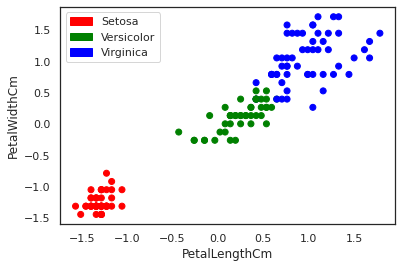

In [ ]:
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['blue', 'red', 'green'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_gmm])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

The plot displays very little overlap between the data points of different clusters, although Versicolor and Virginica are very close to each other.

**Silhouette Score for GMM**

In [ ]:
score_GMM = metrics.silhouette_score(X_scaled, y_cluster_gmm)
score_GMM

0.3727731874570307

This silhouette score is closer to 0 than the score for KMeans. This indicates that some of the clusters are not clearly distinguished in terms of distance between them. I.e. they are extremely close to each other. This can be seen in the previous plot.

**Adjusted Rand Score for GMM**

In [ ]:
ARS_GMM = adjusted_rand_score(y, y_cluster_gmm)
ARS_GMM

0.9038742317748124

The Gaussian mixture model has an adjusted rand score of 0.9. It thus gives a much better fit of clustering to the dataset than KMeans.

We can once again look at whether the choice of the number of clusters for GMM was the best choice by utilizing the AIC and BIC.

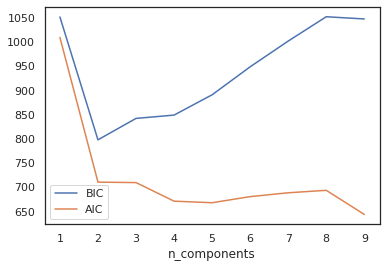

In [ ]:
n_components = np.arange(1, 10)
model = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(X_scaled) for m in model], label='BIC')
plt.plot(n_components, [m.aic(X_scaled) for m in model], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

It appears that 2 would have been a better choice for clusters when using GMM based on the graph above. 

However, we know that there are actually 3 distinct classes of flowers in the dataset, regardless of two of them being extremely similar.

Since the values of Versicolor and Virginica were so close together, they are being considered here as one class of flowers. This could be that they are extremely similar in nature and have similar characteristis. 

Remember, this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm.
Thus, it is recommending 2 as the optimal choice due to the two classes of flowers being directly next to each other.

Nonetheless, let us try to implement the GMM using our number of clusters as 2 this time and demonstrate the outcome of this.


In [ ]:
gmm_I_2 = mixture.GaussianMixture(n_components=2)
gmm_I_2.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm_2 = gmm_I_2.predict(X_scaled)
y_cluster_gmm_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

No handles with labels found to put in legend.


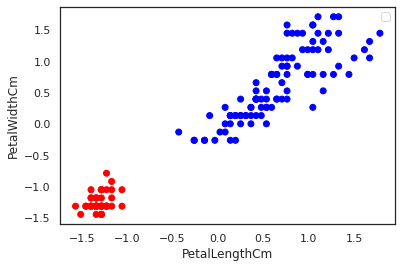

In [ ]:
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_gmm_2])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.show()

We can see now that Versicolor and Virginica have been combined to form one cluster. This is due to how extremely similar their data points were (how close together they were)

In [ ]:
ARS_GMM = adjusted_rand_score(y, y_cluster_gmm_2)
ARS_GMM

0.5681159420289855

However, we see that the adjusted rand score has decreased. Thus, for goodness of clustering, using 3 clusters was indeed the best choice. 


The BIC and AIC scores simply suggest 2 due to the distance between Versicolor and Virginica being extremely small.

We thus conclude that 3 clusters is best and that GMM is the best clustering algorithm to use when compared to Kmeans.

**Computing Elapsed time on Iris Data**

In [ ]:
elapsed_time = {
    'i': [],
    'km': [],
    'gmm': []
}
for i in range(1, 8):
  km = KMeans(n_clusters=i,
              max_iter=1000,
              tol=1e-4)
  gmm = mixture.GaussianMixture(n_components=i,
                                max_iter= 1000,
                                tol=1e-4)
  
  start_km = time.time()
  km.fit_predict(X_scaled)
  end_km = time.time()

  start_gmm = time.time()
  gmm.fit_predict(X_scaled)
  end_gmm = time.time()

  elapsed_time['i'].append(i)
  elapsed_time['km'].append(end_km-start_km)
  elapsed_time['gmm'].append(end_gmm-start_gmm)




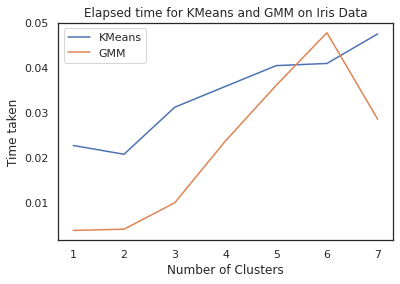

In [ ]:
plt.plot(elapsed_time['i'], elapsed_time['km'], label = 'KMeans')
plt.plot(elapsed_time['i'], elapsed_time['gmm'], label = 'GMM')
plt.legend()
plt.title('Elapsed time for KMeans and GMM on Iris Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Time taken')
plt.show()

We see that GMM is computationally faster when being utilized on the iris dataset.

We conclude that GMM performs much better on the Iris Dataset than KNN